In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
df = pd.read_csv('marketing_campaign.csv', delimiter= '\t')

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Q1 (5 pts) Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-dataLinks to an external site.  or https://www.kaggle.com/datasets/imakash3011/customer-personality-analysisLinks to an external site. . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [51]:
def preprocessing(df, numerical = ['Income'], categorical = ['Education', 'Marital_Status'], date = 'Dt_Customer', birth_col = 'Year_Birth', reference_year = 2024):
    
    for column in numerical:
        
        df[column].fillna(df[column].median())
    
    df[date] = pd.to_datetime(df[date], format = '%d-%m-%Y', errors = 'coerce')
    
    df['Age'] = reference_year - df[birth_col]
    
    df = pd.get_dummies(df, columns = categorical, drop_first = True)
    
    df.replace([np.inf, - np.inf], np.nan, inplace = True)
    
    df.fillna(0, inplace = True)
    
    return df

df_encoded = preprocessing(df)


**I addressed missing values in the numerical columns by imputing them with median values. Subsequently, I converted the date column from a string format to a datetime object. Following this, I created an Age column by calculating the difference between a fixed reference year and the birth year. Categorical variables were transformed using one-hot encoding. To maintain data integrity, I replaced any infinite values or remaining NaNs with zero as a precaution. I then standardized the dataset and converted numerical columns to integer types wherever possible.**

# Q2 (10 pts) Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

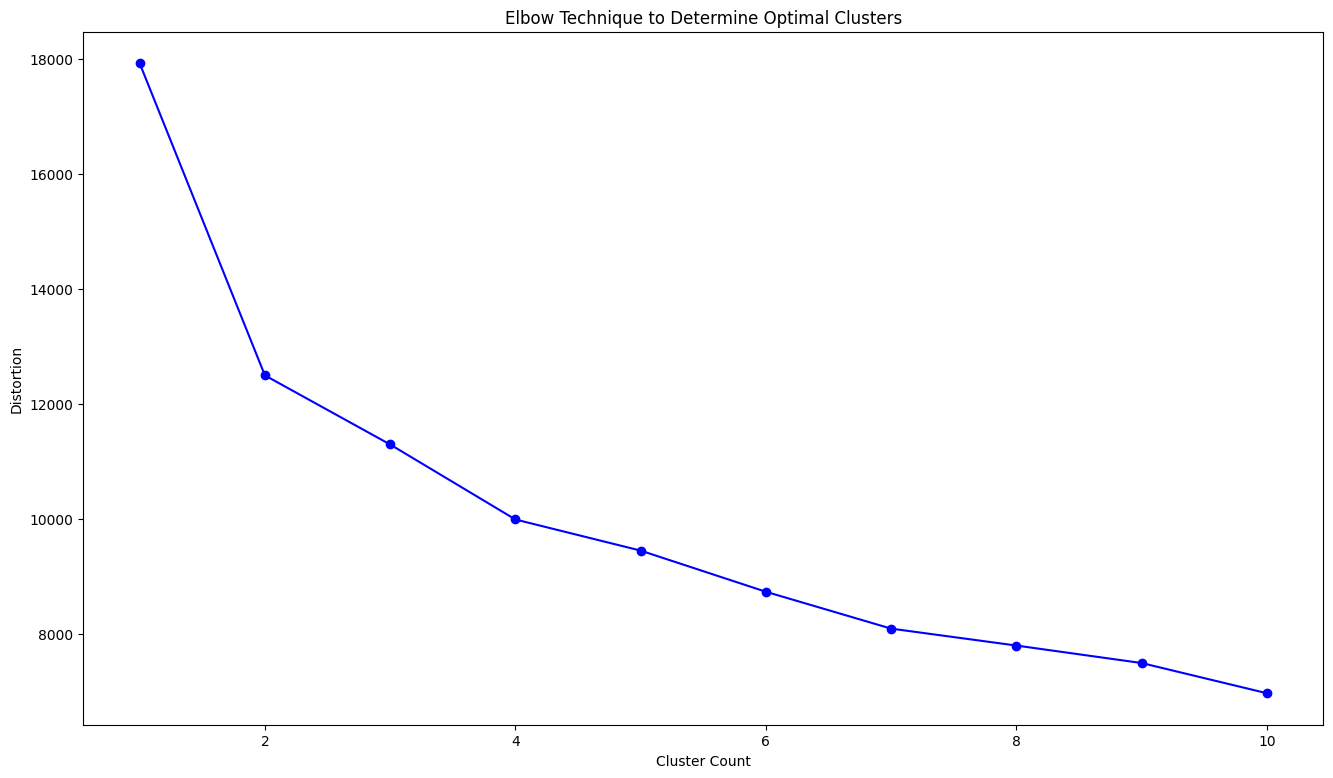

In [52]:
def visualize_elbow(df):
    selected_features = ['Age', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single']
    
    X = df[selected_features]
    
    scaler = StandardScaler()
    
    scaled_data = scaler.fit_transform(X)
    
    distortions = []
    
    possible_clusters = range(1, 11)
    
    for num in possible_clusters:
        
        model = KMeans(n_clusters = num, random_state = 42)
        
        model.fit(scaled_data)
        
        distortions.append(model.inertia_)
    
    plt.figure(figsize = (16, 9))
    
    plt.plot(possible_clusters, distortions, 'bo-')
    
    plt.xlabel('Cluster Count')
    
    plt.ylabel('Distortion')
    
    plt.title('Elbow Technique to Determine Optimal Clusters')
    
    plt.show()

visualize_elbow(df_encoded)


**To perform k-means clustering for customer segmentation, I selected a strategic subset of features including Age, Income, Recency, MntWines, MntMeatProducts, NumWebPurchases, NumStorePurchases, and Marital_Status_Single, as these attributes effectively capture key demographic and purchasing behaviors relevant to identifying distinct customer groups. To determine the optimal number of clusters, I utilized the Elbow Method, which involved standardizing the data with StandardScaler, calculating the within-cluster sum of squares (inertia) for cluster counts ranging from 1 to 10, and plotting these values to identify the "elbow" point where inertia reduction begins to plateau. The Elbow Plot indicated that two or four clusters provide the ideal balance between model simplicity and explanatory power, suggesting that four distinct customer segments can be effectively identified. This approach was chosen for its simplicity and ability to visually and quantitatively assess the optimal number of clusters, ensuring that the resulting segments are both meaningful and actionable for targeted marketing strategies.**

# Q3 (7 pts) Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

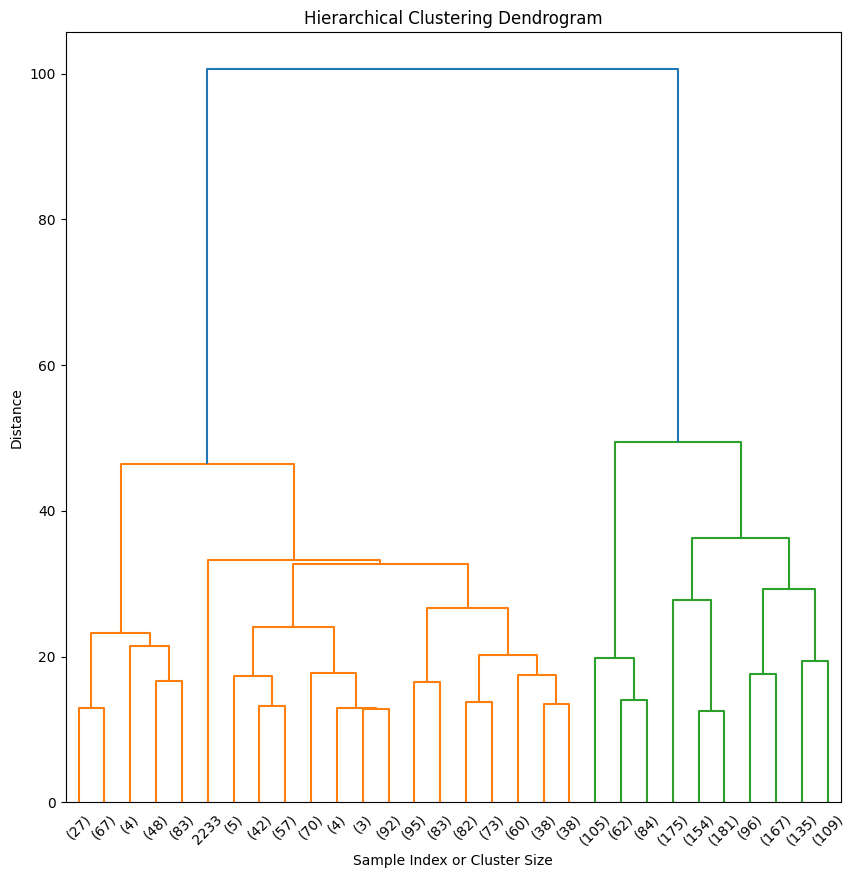

In [53]:
def create_dendrogram(data_frame):
    
    selected_features = ['Age', 'Income', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'Marital_Status_Single']
    
    data = data_frame[selected_features]
    
    scaler = StandardScaler()
    
    scaled_data = scaler.fit_transform(data)
    
    hierarchical_links = linkage(scaled_data, method='ward')
    
    plt.figure(figsize=(10, 10))
    
    dendrogram(hierarchical_links, truncate_mode='lastp', p=30)
    
    plt.xlabel("Sample Index or Cluster Size")
    
    plt.ylabel("Distance")
    
    plt.title("Hierarchical Clustering Dendrogram")
    
    plt.show()

create_dendrogram(df_encoded)


**To perform hierarchical clustering for customer segmentation, I selected key features including Age, Income, Recency, MntWines, MntMeatProducts, NumWebPurchases, NumStorePurchases, and Marital_Status_Single, which effectively capture essential demographic and purchasing behaviors. After standardizing these features with StandardScaler, I applied Ward’s linkage method to generate a dendrogram that visually represents the hierarchical relationships among the data points. By examining the dendrogram, I identified the ideal number of clusters as two, determined by the largest vertical distance that does not intersect any cluster merges, indicating a natural grouping of the data. This approach was chosen because the dendrogram provides a clear visual assessment of the data’s structure, allowing for an informed and objective determination of the optimal number of clusters. Consequently, two distinct customer segments were established, facilitating targeted marketing strategies that cater to the specific characteristics and behaviors of each segment.**

# Q4 (3 pts) Compare the results of 2 and 3. Which approach do you think is best? Why?

**When comparing the Elbow method for k-means clustering with the dendrogram approach for hierarchical clustering, both techniques suggested a similar number of clusters, with the Elbow method indicating two or four clusters based on distortions and hierarchical clustering identifying two clusters as optimal. The Elbow method is advantageous due to its simplicity and computational efficiency, especially with larger datasets, as it provides a clear quantitative measure to determine the optimal number of clusters by analyzing the rate of decrease in distortions. In contrast, hierarchical clustering offers a more detailed view of the data's structure through the dendrogram, allowing for a nuanced understanding of how clusters are nested at various levels. However, hierarchical clustering can be more computationally intensive and less scalable with larger datasets. Given these considerations, the Elbow method is preferable in this context because it efficiently identifies a meaningful number of customer segments with minimal computational resources, making it the best approach for effectively targeting marketing strategies based on distinct customer groups.**